<a href="https://colab.research.google.com/github/agord1994/MLA_ASG/blob/main/FinalProject_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment-Final Project#  
**Andrew Gordon**  

Data source link: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR,SVC,LinearSVC,LinearSVR


## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

## Problem 1

### Reading the Data

In [ ]:
car_df= pd.read_csv('/content/gdrive/MyDrive/CS430/car data.csv')

### Statistical and Visual Exploration

In [ ]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
car_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
car_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


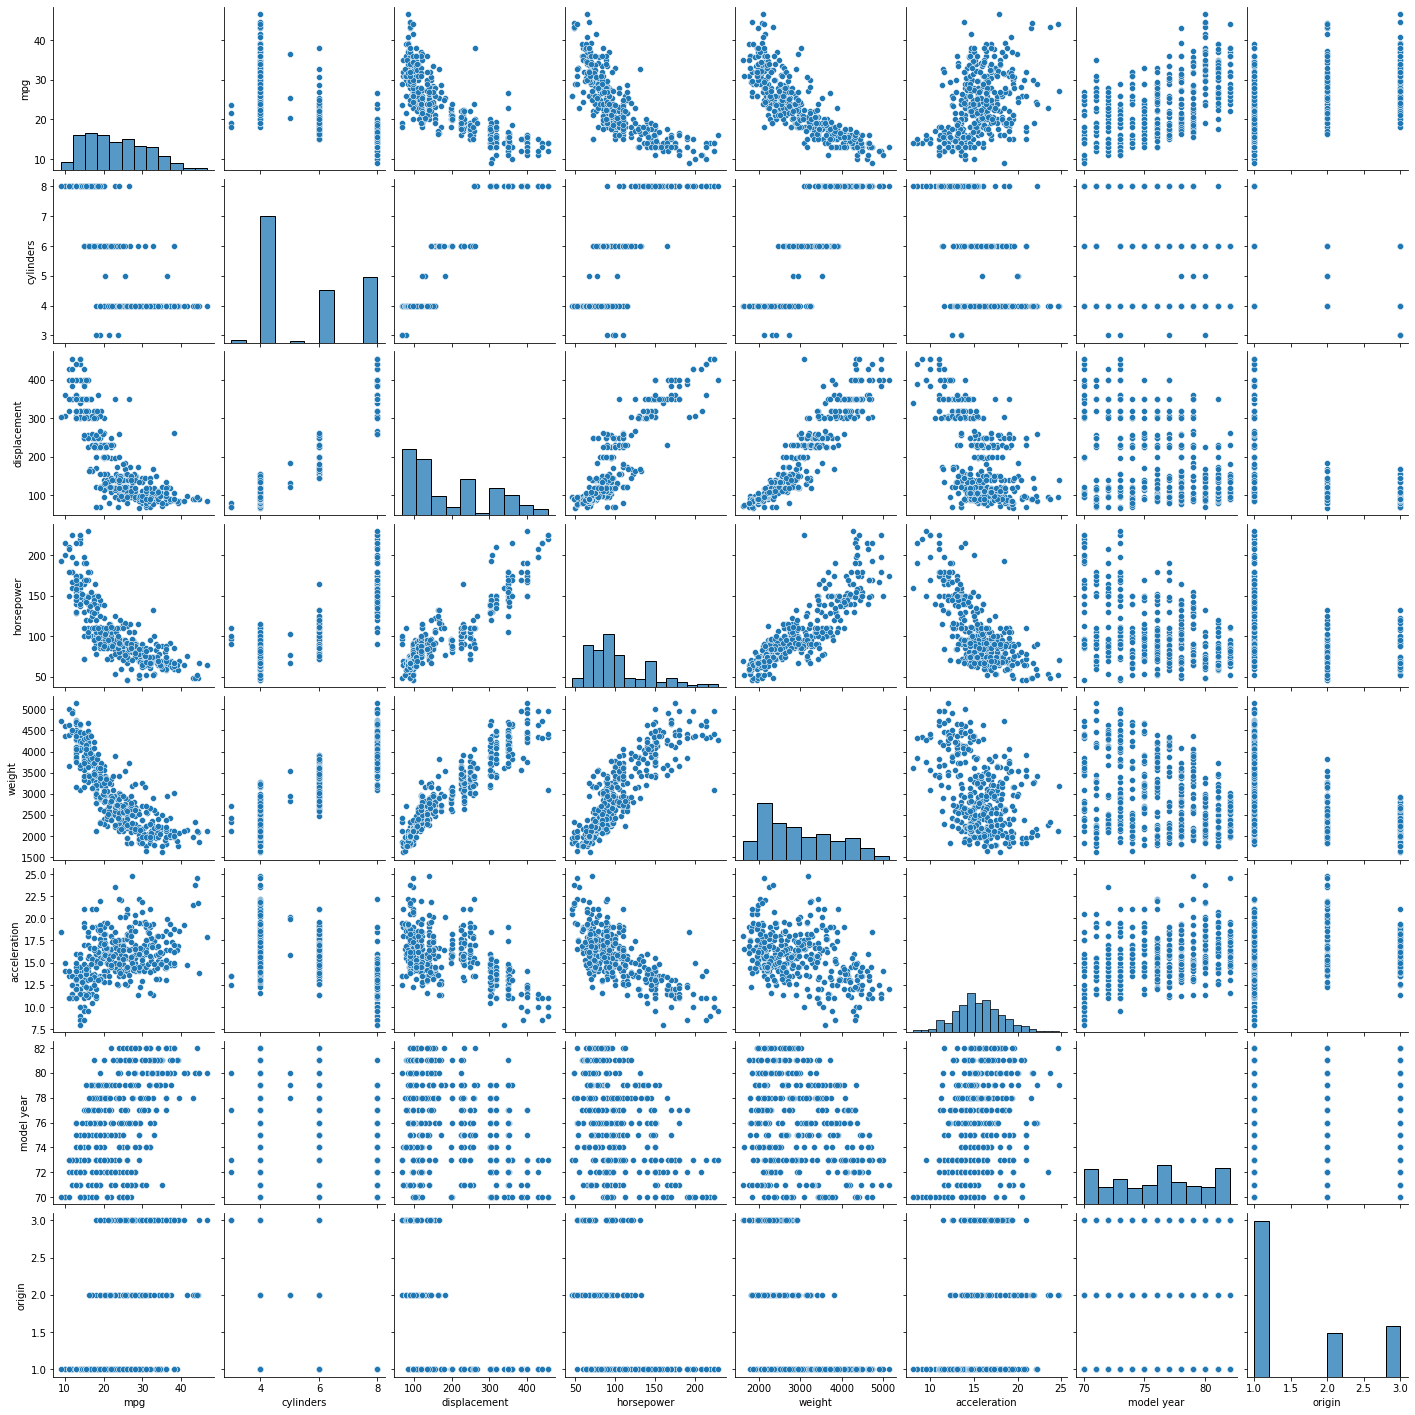

In [ ]:
sns.pairplot(car_df)

relationships look linear between weight, displacement,horsepower,mpg and acceleration

In [ ]:
differentmodelyears = car_df['model year'].groupby(car_df['model year']).count()
differentmodelyears

model year
70    29
71    27
72    28
73    40
74    26
75    30
76    34
77    28
78    36
79    29
80    27
81    28
82    30
Name: model year, dtype: int64

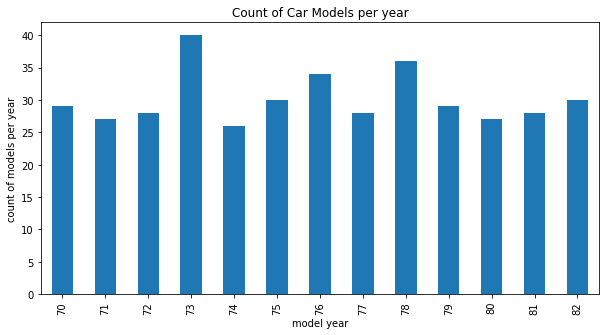

In [ ]:
differentmodelyears.plot(kind="bar", x="model year",y="differentmodelyears",xlabel="model year", ylabel="count of models per year", title="Count of Car Models per year",figsize=(10,5))


graph above shows that there are more model numbers in 1973 and the least amount in 1974

In [ ]:
differentcarnames = car_df['car name'].groupby(car_df['car name']).count()
differentcarnames

car name
amc ambassador brougham    1
amc ambassador dpl         1
amc ambassador sst         1
amc concord                2
amc concord d/l            1
                          ..
vw dasher (diesel)         1
vw pickup                  1
vw rabbit                  2
vw rabbit c (diesel)       1
vw rabbit custom           1
Name: car name, Length: 301, dtype: int64

It looks like that most car names are unique. Some car names have duplicate values

### Splitting Data into Train/Test

In [ ]:
X=car_df[['cylinders','displacement','horsepower','weight','acceleration','model year','origin']] #putting variables into X data frame- leaving off car names because most values are unique
y=car_df['mpg']# putting mpg into y data frame- this is variable we are trying to predict


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2,random_state=0)#splitting up data into 4 dataframes. test data frames will have 20% of data to check validity of training sets

### Building the Pipeline

In [ ]:
num_attribs= ['cylinders','displacement','horsepower','weight','acceleration','model year','origin'] #all values are numerical

In [ ]:
col_transform=ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs)], remainder='passthrough')

In [ ]:
pipeline= Pipeline([
    ('transform', col_transform),
    ('mlr_model',LinearRegression())
])

### Executing the Model

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['cylinders', 'displacement',
                                                   'horsepower', 'weight',
                                                   'acceleration', 'model year',
                                                   'origin'])])),
                ('mlr_model', LinearRegression())])

### Evaluating the Model

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:

y_train_pred= pipeline.predict(X_train)
y_test_pred=pipeline.predict(X_test)

print(mean_squared_error(y_train,y_train_pred)**(.5)) 
print(mean_squared_error(y_test,y_test_pred)**(.5))


3.3292493579432634
3.189152504297503


In [ ]:
r2_score(y_test,y_test_pred)

0.8363664681024056

### Conclusion


Looking at the Root Mean Square Error of the testing and training set we can set the values are fairly consistent. We can see the variation is in the data and is captured by this model. We use the r squared value to see this. In this case R^2 is .83 which is relatively high, but not perfect. The next step is to try a Support Vector Model and compare which model has a better outcome.

## Problem 2-SVM



### Splitting Data into Train/Test

used same data and variables from above 

### Building the Pipeline

In [ ]:
pipeline= Pipeline([
    ('transform', col_transform),
    ('SVR',SVR(kernel="linear", C=1, max_iter=1000000,epsilon=0.0)),
])

In [ ]:
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['cylinders', 'displacement',
                                                   'horsepower', 'weight',
                                                   'acceleration', 'model year',
                                                   'origin'])])),
                ('SVR',
                 SVR(C=1, epsilon=0.0, kernel='linear', max_iter=1000000))])

### Executing the Model

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['cylinders', 'displacement',
                                                   'horsepower', 'weight',
                                                   'acceleration', 'model year',
                                                   'origin'])])),
                ('SVR',
                 SVR(C=1, epsilon=0.0, kernel='linear', max_iter=1000000))])

### Evaluating Model

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
y_train_pred= pipeline.predict(X_train)
y_test_pred=pipeline.predict(X_test)

In [ ]:
print(mean_squared_error(y_train,y_train_pred)**(.5))
print(mean_squared_error(y_test,y_test_pred)**(.5))

3.676889731103373
3.228922544302686


In [ ]:
r2_score(y_test,y_test_pred)

0.8322598667274279

### implementing GridSearch pipeline model

In [ ]:
param_grid= {'SVR__C':[0.1, 1, 10,25,50,75, 100, 1000],'SVR__gamma': [1, 0.1, 0.01, 0.001, 0.0001],'SVR__kernel': ['rbf','linear']}

In [ ]:
grid_pipeline= GridSearchCV(pipeline,param_grid)

### Executing Gridsearch Pipeline

In [ ]:
grid_pipeline.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['cylinders',
                                                                          'displacement',
                                                                          'horsepower',
                                                                          'weight',
                                                                          'acceleration',
                                                                          'model '
                                                                          'year',
                                                                          'origin'])])),
                                       ('SVR',
                                        SVR(C=1, epsilon=0.0, kernel='linear',
                                            max_iter=1000000))]),
             param_grid={'SVR__C': [0.1, 1, 10, 25, 50, 75, 100, 1000],
                         'SVR__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'SVR__kernel': ['rbf', 'linear']})

In [ ]:
grid_pipeline.best_params_ #best performance parameters

{'SVR__C': 50, 'SVR__gamma': 1, 'SVR__kernel': 'rbf'}

going to try to build a pipeline with the best hyperparameters

In [ ]:
pipeline= Pipeline([
    ('transform', col_transform),
    ('SVR',SVR(kernel="rbf", C=50, max_iter=1000000,epsilon=0.0)),
])

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['cylinders', 'displacement',
                                                   'horsepower', 'weight',
                                                   'acceleration', 'model year',
                                                   'origin'])])),
                ('SVR', SVR(C=50, epsilon=0.0, max_iter=1000000))])

###Evaluating adjusted hyperparameters

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
y_train_pred= pipeline.predict(X_train)
y_test_pred=pipeline.predict(X_test)

In [ ]:
print(mean_squared_error(y_train,y_train_pred)**(.5))
print(mean_squared_error(y_test,y_test_pred)**(.5))

2.1570584596435967
2.350814147701071


In [ ]:
r2_score(y_test,y_test_pred)

0.9110884214798535

### Conclusion


After running a support vector regression model for the first time with a linear kernel and a C=1 you would receive a R^2 score of .83, which would be similar to the R^2 of the linear regression model. We then had to create a GridSearch pipeline to find the best combination of hyperparameters to tune the SVR model. After tuning the model we were able to come to the conclusion that an SVR pipeline with kernel="rbf" and C=50 have the best parameters based on performance. After that, I constructed another pipeline with these parameters and received a mean square error of 2.15 for the training data set and 2.35 for the testing set. Which is lower than the multiple regression model. A R^2 score was run and the model recevied a score of .91, which is greater than the R^2 score of the linear regression model. Therefore, the SVR model is a better predictor of mpg than that of the linear regression model. 